In [1]:
print("hii")

hii


In [3]:
import pandas as pd
import re

# ---------- STEP 1: LOAD YOUR DATA ----------
projects = pd.read_csv("data/project.csv")
addresses = pd.read_csv("data/ProjectAddress.csv")
configs = pd.read_csv("data/ProjectConfiguration.csv")
variants = pd.read_csv("data/ProjectConfigurationVariant.csv")

# ---------- STEP 2: MERGE ALL FILES ----------
merged1 = pd.merge(projects, addresses, left_on="id", right_on="projectId", how="left", suffixes=("", "_address"))
merged2 = pd.merge(merged1, configs, left_on="id", right_on="projectId", how="left", suffixes=("", "_config"))
master_df = pd.merge(merged2, variants, left_on="id_config", right_on="configurationId", how="left")

# ---------- STEP 3: KEEP ONLY USEFUL COLUMNS ----------
chatbot_df = master_df[[
    "projectName",
    "status",
    "possessionDate",
    "fullAddress",
    "pincode",
    "type",             # e.g. 1BHK, 2BHK, 3BHK
    "carpetArea",
    "price",
    "bathrooms",
    "balcony",
    "listingType",
    "furnishedType",
    "projectCategory",
    "projectType",
    "propertyCategory",
    "landmark",
    "cityId",
    "localityId",
    "subLocalityId",
    "propertyImages",
    "floorPlanImage"
]].copy()

In [4]:
chatbot_df.head()

,projectName,status,possessionDate,fullAddress,pincode,type,carpetArea,price,bathrooms,balcony,...,furnishedType,projectCategory,projectType,propertyCategory,landmark,cityId,localityId,subLocalityId,propertyImages,floorPlanImage
0,Ashwini,UNDER_CONSTRUCTION,2025-09-28 00:00:00,Mumbai chembur,411017,1BHK,123.00,11111111,1,1.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Babys school,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
1,Ashwini,UNDER_CONSTRUCTION,2025-09-28 00:00:00,Mumbai chembur,411017,2BHK,456.00,22222222,0,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Babys school,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
2,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,972.00,120000000,12,3.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
3,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,188.73,210000000,3,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
4,Gurukripa,UNDER_CONSTRUCTION,NaN,"Sindhi Society, Near Swami Vivekanand Jr Colle...",400071,1BHK,426.57,13000000,1,1.0,...,UNFURNISHED,COMPLEX,RESIDENTIAL,RESIDENTIAL,Sindhi Society,cmf50r5a00000vcj0k1iuocuu,cmf51ieam0001vcj0kljobiod,cmf51ix980003vcj0z7abv17k,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...


In [5]:

# Convert 'price' to numeric (if in lakhs/crores)
def clean_price(value):
    if pd.isna(value):
        return None
    if isinstance(value, (int, float)):
        return value
    value = str(value).replace("₹", "").replace(",", "").strip().lower()
    if "cr" in value or "crore" in value:
        num = float(re.findall(r"[0-9.]+", value)[0])
        return num * 1e7
    elif "lakh" in value or "lac" in value:
        num = float(re.findall(r"[0-9.]+", value)[0])
        return num * 1e5
    elif re.search(r"[0-9]", value):
        return float(re.findall(r"[0-9.]+", value)[0])
    else:
        return None

chatbot_df["price"] = chatbot_df["price"].apply(clean_price)

# Convert carpet area to numeric
chatbot_df["carpetArea"] = pd.to_numeric(chatbot_df["carpetArea"], errors="coerce")

# Fill missing values with blank or zeros where appropriate
chatbot_df["status"].fillna("UNKNOWN", inplace=True)
chatbot_df["listingType"].fillna("Sell", inplace=True)

# ---------- STEP 5: SAVE CLEANED DATA ----------
chatbot_df.to_csv("cleaned_master_for_chatbot.csv", index=False)

C:\Users\Global\AppData\Local\Temp\ipykernel_11860\567421458.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chatbot_df["status"].fillna("UNKNOWN", inplace=True)
C:\Users\Global\AppData\Local\Temp\ipykernel_11860\567421458.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [7]:
print("✅ Cleaned dataset created successfully!")
print(f"Rows: {len(chatbot_df)}, Columns: {len(chatbot_df.columns)}")
chatbot_df.head()

✅ Cleaned dataset created successfully!
Rows: 83, Columns: 21


,projectName,status,possessionDate,fullAddress,pincode,type,carpetArea,price,bathrooms,balcony,...,furnishedType,projectCategory,projectType,propertyCategory,landmark,cityId,localityId,subLocalityId,propertyImages,floorPlanImage
0,Ashwini,UNDER_CONSTRUCTION,2025-09-28 00:00:00,Mumbai chembur,411017,1BHK,123.00,11111111,1,1.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Babys school,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
1,Ashwini,UNDER_CONSTRUCTION,2025-09-28 00:00:00,Mumbai chembur,411017,2BHK,456.00,22222222,0,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Babys school,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
2,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,972.00,120000000,12,3.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
3,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,188.73,210000000,3,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
4,Gurukripa,UNDER_CONSTRUCTION,NaN,"Sindhi Society, Near Swami Vivekanand Jr Colle...",400071,1BHK,426.57,13000000,1,1.0,...,UNFURNISHED,COMPLEX,RESIDENTIAL,RESIDENTIAL,Sindhi Society,cmf50r5a00000vcj0k1iuocuu,cmf51ieam0001vcj0kljobiod,cmf51ix980003vcj0z7abv17k,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...


In [141]:
df = pd.read_csv("cleaned_master_for_chatbot.csv")

In [142]:
df.head()

,projectName,status,possessionDate,fullAddress,pincode,type,carpetArea,price,bathrooms,balcony,...,furnishedType,projectCategory,projectType,propertyCategory,landmark,cityId,localityId,subLocalityId,propertyImages,floorPlanImage
0,Ashwini,UNDER_CONSTRUCTION,2025-09-28 00:00:00,Mumbai chembur,411017,1BHK,123.00,11111111,1,1.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Babys school,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
1,Ashwini,UNDER_CONSTRUCTION,2025-09-28 00:00:00,Mumbai chembur,411017,2BHK,456.00,22222222,0,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Babys school,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
2,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,972.00,120000000,12,3.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
3,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,188.73,210000000,3,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
4,Gurukripa,UNDER_CONSTRUCTION,NaN,"Sindhi Society, Near Swami Vivekanand Jr Colle...",400071,1BHK,426.57,13000000,1,1.0,...,UNFURNISHED,COMPLEX,RESIDENTIAL,RESIDENTIAL,Sindhi Society,cmf50r5a00000vcj0k1iuocuu,cmf51ieam0001vcj0kljobiod,cmf51ix980003vcj0z7abv17k,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...


In [124]:
df["status"].unique()

array(['UNDER_CONSTRUCTION', 'READY_TO_MOVE'], dtype=object)

In [12]:
df.isnull().sum()

projectName          0
status               0
possessionDate      66
fullAddress          0
pincode              0
type                 0
carpetArea           0
price                0
bathrooms            0
balcony              3
listingType          0
furnishedType        0
projectCategory      0
projectType          0
propertyCategory     0
landmark             0
cityId               0
localityId           0
subLocalityId        0
propertyImages       0
floorPlanImage       2
dtype: int64

In [17]:
df["listingType"]

0     Sell
1     Sell
2     Sell
3     Sell
4     Sell
      ... 
78    Sell
79    Sell
80    Sell
81    Sell
82    Sell
Name: listingType, Length: 83, dtype: object

In [125]:
df["status"].unique()

array(['UNDER_CONSTRUCTION', 'READY_TO_MOVE'], dtype=object)

In [133]:
df["furnishedType"].unique()

array(['UNFURNISHED', 'FURNISHED', 'SEMI_FURNISHED'], dtype=object)

In [136]:
df["bathrooms"].dtype

dtype('int64')

In [144]:
df["listingType"].unique()

array(['Sell'], dtype=object)

In [14]:
df.shape

(83, 21)

In [274]:
response

{'carpetArea': 123,
 'furnishedType': 'UNFURNISHED',
 'listingType': 'Sell',
 'fullAddress': 'Wakad, Pune',
 'price': {'min': 1000000, 'max': 10000000},
 'type': '1BHK'}

In [281]:
df["status"].unique()

array(['UNDER_CONSTRUCTION', 'READY_TO_MOVE'], dtype=object)

In [279]:
df["projectCategory"].unique()

array(['STANDALONE', 'COMPLEX', 'TOWNSHIP'], dtype=object)

In [394]:
for i in range(30,50):
    print(list(df["fullAddress"])[i])

Marigold Miraaya, Purushottam Kheraj Rd, Asha Nagar, Mulund West, Mumbai, Maharashtra 400080
Marigold Miraaya, Purushottam Kheraj Rd, Asha Nagar, Mulund West, Mumbai, Maharashtra 400080
64C5+C63 Dombivli East Dombivli Maharashtra 421301
64C5+C63 Dombivli East Dombivli Maharashtra 421301
3WG5+CHM, 90 Feet Rd, Garodia Nagar, Ghatkopar East, Mumbai, Maharashtra 400077
3WG5+CHM, 90 Feet Rd, Garodia Nagar, Ghatkopar East, Mumbai, Maharashtra 400077
3WG5+CHM, 90 Feet Rd, Garodia Nagar, Ghatkopar East, Mumbai, Maharashtra 400077
Makwana Rd, Gamdevi, Marol, Andheri East, Mumbai, Maharashtra 400059
Makwana Rd, Gamdevi, Marol, Andheri East, Mumbai, Maharashtra 400059
Makwana Rd, Gamdevi, Marol, Andheri East, Mumbai, Maharashtra 400059
 Kate Wasti Rd, Kate Wasti, Punawale, Pimpri-Chinchwad, Dattwadi, Maharashtra 411033
 Kate Wasti Rd, Kate Wasti, Punawale, Pimpri-Chinchwad, Dattwadi, Maharashtra 411033
 Kate Wasti Rd, Kate Wasti, Punawale, Pimpri-Chinchwad, Dattwadi, Maharashtra 411033
CTS NO 391

In [15]:
df.columns

Index(['projectName', 'status', 'possessionDate', 'fullAddress', 'pincode',
       'type', 'carpetArea', 'price', 'bathrooms', 'balcony', 'listingType',
       'furnishedType', 'projectCategory', 'projectType', 'propertyCategory',
       'landmark', 'cityId', 'localityId', 'subLocalityId', 'propertyImages',
       'floorPlanImage'],
      dtype='object')

In [398]:
df["bathrooms"]

0      1
1      0
2     12
3      3
4      1
      ..
78     9
79     1
80     1
81     2
82     2
Name: bathrooms, Length: 83, dtype: int64

In [236]:
df['price']

0      11111111
1      22222222
2     120000000
3     210000000
4      13000000
        ...    
78     80000000
79      7944000
80     10700000
81     15300000
82     16700000
Name: price, Length: 83, dtype: int64

In [98]:
df["status"]

0     UNDER_CONSTRUCTION
1     UNDER_CONSTRUCTION
2          READY_TO_MOVE
3          READY_TO_MOVE
4     UNDER_CONSTRUCTION
             ...        
78    UNDER_CONSTRUCTION
79    UNDER_CONSTRUCTION
80    UNDER_CONSTRUCTION
81    UNDER_CONSTRUCTION
82    UNDER_CONSTRUCTION
Name: status, Length: 83, dtype: object

In [102]:
"hello".astype(str)

AttributeError: 'str' object has no attribute 'astype'

In [79]:
for i in list(df["fullAddress"])[:10]:
    print(i)

Mumbai chembur
Mumbai chembur
sr no 13 beside godrej, opposite to mca stadium, sai nagar, mamurdi, pune 
sr no 13 beside godrej, opposite to mca stadium, sai nagar, mamurdi, pune 
Sindhi Society, Near Swami Vivekanand Jr College, Chembur, Mumbai Harbour, Mumbai
Sindhi Society, Near Swami Vivekanand Jr College, Chembur, Mumbai Harbour, Mumbai
Sindhi Society, Near Swami Vivekanand Jr College, Chembur, Mumbai Harbour, Mumbai
Sindhi Society, Near Swami Vivekanand Jr College, Chembur, Mumbai Harbour, Mumbai
Sindhi Society, Near Swami Vivekanand Jr College, Chembur, Mumbai Harbour, Mumbai
Sindhi Society, Near Swami Vivekanand Jr College, Chembur, Mumbai Harbour, Mumbai


In [54]:
df["carpetArea"]

0     123.00
1     456.00
2     972.00
3     188.73
4     426.57
       ...  
78      7.00
79    331.85
80    396.97
81    568.98
82    619.89
Name: carpetArea, Length: 83, dtype: float64

In [19]:
df["projectCategory"]

0     STANDALONE
1     STANDALONE
2     STANDALONE
3     STANDALONE
4        COMPLEX
         ...    
78       COMPLEX
79    STANDALONE
80      TOWNSHIP
81      TOWNSHIP
82      TOWNSHIP
Name: projectCategory, Length: 83, dtype: object

In [420]:
df.columns

Index(['projectName', 'status', 'possessionDate', 'fullAddress', 'pincode',
       'type', 'carpetArea', 'price', 'bathrooms', 'balcony', 'listingType',
       'furnishedType', 'projectCategory', 'projectType', 'propertyCategory',
       'landmark', 'cityId', 'localityId', 'subLocalityId', 'propertyImages',
       'floorPlanImage'],
      dtype='object')

In [33]:
df["projectType"] == "Commercial"

0     False
1     False
2     False
3     False
4     False
      ...  
78    False
79    False
80    False
81    False
82    False
Name: projectType, Length: 83, dtype: bool

In [18]:
df["furnishedType"]

0     UNFURNISHED
1     UNFURNISHED
2     UNFURNISHED
3     UNFURNISHED
4     UNFURNISHED
         ...     
78    UNFURNISHED
79    UNFURNISHED
80    UNFURNISHED
81    UNFURNISHED
82    UNFURNISHED
Name: furnishedType, Length: 83, dtype: object

In [46]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv
from langgraph.graph import START, END,StateGraph

In [109]:
from typing import TypedDict,List,Dict,Optional,Any

In [51]:
load_dotenv()

True

In [485]:
llm = ChatOpenAI(model = "gpt-4.1")

In [486]:
llm.invoke("what is data science and ai").content

'Sure! Here’s a clear explanation of both:\n\n---\n\n## Data Science\n\n**Data Science** is an interdisciplinary field that involves using scientific methods, algorithms, and systems to extract knowledge and insights from structured and unstructured data. It combines aspects of statistics, mathematics, computer science, and domain expertise.\n\n- **Key Steps in Data Science:**\n  1. **Data Collection:** Gathering relevant data from various sources.\n  2. **Data Cleaning and Preparation:** Processing data to handle missing values, errors, and formatting.\n  3. **Data Analysis and Exploration:** Using statistical and visualization tools to understand data patterns.\n  4. **Modeling:** Applying algorithms to make predictions or find patterns (may include machine learning).\n  5. **Communication:** Presenting insights through reports, dashboards, or visualizations.\n\n- **Applications:** Business analytics, healthcare predictions, finance, marketing, social sciences, and more.\n\n---\n\n##

In [476]:
## i want the response of my main agent into a structured format with typeddict
class PropertyQuery(TypedDict, total=False):
    status: Optional[str]
    possessionDate: Optional[str]
    fullAddress: Optional[str]
    pincode: Optional[str]
    type: Optional[str]
    carpetArea: Optional[float]
    price: Optional[float]
    bathrooms: Optional[int]
    balcony: Optional[int]
    listingType: Optional[str]
    furnishedType: Optional[str]
    projectCategory: Optional[str]
    projectType: Optional[str]


In [488]:
structured_llm = llm.with_structured_output(PropertyQuery)

In [478]:
from typing import Annotated, TypedDict, Optional

def merge_dicts(existing: Optional[dict], new: dict) -> dict:
    if existing is None:
        return dict(new)
    existing.update(new)   # new wins on sub-key collisions
    return existing



In [457]:
### first of all creating the state for the dictionary
class State(TypedDict):
    user_query:str
    output_dict:Dict
    df_dict:Annotated[dict, merge_dicts]
    response:str


In [314]:
list(df['possessionDate'])[1].split( " ")[0]

'2025-09-28'

In [311]:
type(list(df['possessionDate'])[10])

float

In [487]:
def main_agent(state:State) -> dict:
    """
    Takes a user query like:
        "Show me 3BHK flats in Pune under ₹1.2 Cr"
    Returns a dictionary:
        {
          "type": "3BHK",
          "fullAddress": "Pune",
          "price": 12000000
        }
    """

    template = """
You are a strict JSON extractor for real-estate search queries.

Task:
Given a user's natural-language real-estate query, output **ONLY** a single valid JSON object (no extra text, no explanation). The JSON object must include ZERO or more keys from this exact set:

[
  "status",
  "possessionDate",
  "fullAddress",
  "pincode",
  "type",
  "carpetArea",
  "price",
  "bathrooms",
  "balcony",
  "listingType",
  "furnishedType",
  "projectCategory",
  "projectType"
]

Output rules & normalization:
1. Price:
   - Convert prices to numeric **rupees** (integers or floats).  
     *Examples:* "1.2 Cr" -> 12000000, "80 lakh" -> 8000000.
   
   - If user says **"above"/"over"**, set `"price"` to a **single numeric value** representing the lower bound.
     *Example:* "above 50 lakh" -> `"price": 5000000`
   - If user gives a **range** (`"between X and Y"`), set `"price"` to an object with `{{"min": <rupees>, "max": <rupees>}}.
     *Example:* "between 50 and 80 lakh" -> `"price": {{"min": 5000000, "max": 8000000}}
   - - If user says **"under"/"below"/"up to"**, set `"price"` to a **single numeric value** representing the upper bound.
     *Example:* "under ₹1.2 Cr" -> `{{"min":0,"max":12000000}}
     IMPORTANT: price output format rules (BE VERY STRICT)
- If the user expresses an upper bound using words like "under", "below", "up to", or "maximum", the model MUST output the price as an object with "min" and "max". Use min = 0 and max = <rupees value>.
  Example: "under 1.2 Cr"  ->  "price": {{"min": 0, "max": 12000000}}
- If the user expresses a lower bound using words like "above", "over", "minimum", the model MUST output price as an object with "min" and "max". Use max = null (or omit max) and min = <rupees value>.
  Example: "above 50 lakh" -> "price": {{"min": 5000000, "max": null}}
- If the user gives a closed range ("between X and Y"), the model MUST output price as {{"min": <rupees>, "max": <rupees>}}.
- If the user gives an exact price (e.g., "price 12,000,000" or "budget 1.2 Cr" with no comparison word), the model MAY output either a numeric value or an object; prefer object for consistency is allowed but not required.
- Always convert human units to rupees (1.2 Cr -> 12000000, 80 lakh -> 8000000).


2. Type (BHK):
   - Use the format `"1BHK"`, `"2BHK"`, `"3BHK"`, etc. Normalize words ("three bhk") to numeric form.

3. possessionDate:
   - This represents the **expected date when the property will be ready for possession (handover date)**.
   - If the property is already ready to move in, use the status "READY_TO_MOVE" instead of setting a future possessionDate.
   - If the user specifies a **future date, year, or range**, convert it into the ISO date format "YYYY-MM-DD".
   - If the user only mentions a **year**, assume the start of that year ("YYYY-01-01").
     Example: "possession in 2025" → "possessionDate": "2025-01-01"
   - If the user mentions **by, before, or until a year**, treat it as **upper bound**.
     Example: "possession by 2026" → "possessionDate": "2026-01-01"
   - If the user says **after or from a year**, treat it as **lower bound**.
     Example: "possession after 2024" → "possessionDate": "2024-01-01"
   - If the user says **ready to move / already ready / immediate possession**, do **NOT** set possessionDate.
     Instead, set `"status": "READY_TO_MOVE"`.
   - Always use a valid date string in ISO format. Examples:
       "2025" → "2025-01-01"
       "Dec 2024" → "2024-12-01"
       "after 2023" → "2023-01-01"
   - If no clear possession information is given, **omit the key** (do not guess or hallucinate).
   - Do not output explanatory text — only the JSON key-value pair.

Examples (strictly follow these):

Example 1:
User: "Show me 2BHK flats ready in 2025"
Output:
{{"type": "2BHK", "possessionDate": "2025-01-01"}}

Example 2:
User: "Flats with possession by 2026 in Mumbai"
Output:
{{"fullAddress": "Mumbai", "possessionDate": "2026-01-01"}}

Example 3:
User: "3BHK ready to move apartments in Pune"
Output:
{{"type": "3BHK", "status": "READY_TO_MOVE", "fullAddress": "Pune"}}

Example 4:
User: "Possession after 2024 near Baner"
Output:
{{"possessionDate": "2024-01-01", "fullAddress": "Baner"}}

Example 5:
User: "Ready to move property"
Output:
{{"status": "READY_TO_MOVE"}}

Example 6:
User: "Expected possession in December 2025"
Output:
{{"possessionDate": "2025-12-01"}}

4. fullAddress:
   - Prefer the city / locality string that appears in the query (capitalized). e.g., "Pune", "Wakad, Pune", "Chembur, Mumbai".
   - If the user gives a pincode, include `"pincode"` (string) too.

5. pincode:
   - 6-digit postal code as string.

6. carpetArea:
   - Numeric area in square feet (integer or float). Accept inputs like "800 sqft" -> 800.

7. bathrooms and balcony:
   - Integers.

8. listingType:
   - Normalize to `"Sell"` (for sale/resale) or `"Rent"`.

9. furnishedType:
   - Normalize to `"FURNISHED"`, `"SEMI_FURNISHED"`, or `"UNFURNISHED"`.

10. projectCategory:
    - `"STANDALONE"` or `"COMPLEX"`.

11. projectType (and propertyCategory if implied):
    - `"RESIDENTIAL"` or `"COMMERCIAL"`.
12. status (The current status of the project):
     - 'UNDER_CONSTRUCTION'or  'READY_TO_MOVE'


12. If a key isn't clearly mentioned or implied in the query, DO NOT include that key.

13. Always output valid JSON only. Do not output explanatory text, markdown, or code fences.

14. If the user provides conflicting specifications, choose the most recent explicit statement in the query. If still ambiguous, omit the conflicting key.

Examples (these are strict examples you must follow):

Example A:
User: "Show me 3BHK flats in Pune of ₹1.2 Cr"
Output:
{{"type":"3BHK","location":"Pune","price": 12000000 }}

Example B:
User: "2 bhk semi-furnished for rent in Wakad, Pune above 800 sqft"
Output:
{{"type":"2BHK","listingType":"Rent","furnishedType":"SEMI_FURNISHED","fullAddress":"Wakad, Pune","carpetArea":800}}

Example C:
User: "Any ready-to-move 1 BHK in Mumbai pincode 400075"
Output:
{{"type":"1BHK","status":"READY_TO_MOVE","fullAddress":"Mumbai","pincode":"400075"}}

Example D:
User: "3BHK with 2 bathrooms and 2 balconies in Bangalore under 90 lakh"
Output:
{{"type":"3BHK","bathrooms":2,"balcony":2,"fullAddress":"Bangalore","price":9000000}}

Example E:
User: "Looking for a standalone complex, 4BHK, possession by 2026, fully furnished"
Output:
{{"projectCategory":"STANDALONE","type":"4BHK","possessionDate":"2026-01-01","furnishedType":"FURNISHED"}}



Example F:
User: "I want a commercial shop for rent near MG Road, Bangalore, budget 1.5 Cr"
Output:
{{"projectType":"COMMERCIAL","listingType":"Rent","fullAddress":"MG Road, Bangalore","price":15000000}}

Example G:
User: "Unfurnished 1 BHK for sale, carpet area 450 sqft, under 35 L"
Output:
{{"type":"1BHK","furnishedType":"UNFURNISHED","listingType":"Sell","carpetArea":450,"price":3500000}}

Example H:
User: "Flats ready in 2024 in Chembur with at least 2 balconies"
Output:
{{"possessionDate":"2024-01-01","fullAddress":"Chembur","balcony":2}}

Example I:
User: "2 BHK resale in Noida with 2 bathrooms and pincode 201301"
Output:
{{"type":"2BHK","listingType":"Sell","fullAddress":"Noida","bathrooms":2,"pincode":"201301"}}

Now, process this user query and **output ONLY** the JSON object (no commentary):

User: {user_query}
    
    

                                                                                 """
    user_query = state.get("user_query")
    prompt = PromptTemplate(template = template,input_variables = ["user_query"])

    chain = prompt | structured_llm 
    response = chain.invoke({"user_query":user_query})
    return {"output_dict":response}

In [180]:
df["type"].unique()

array(['1BHK', '2BHK', '3BHK', 'Office', 'Office space', '4.5BHK', '5BHK',
       '4BHK', 'House_Villa', '1RK '], dtype=object)

In [172]:
df["furnishedType"].unique()

array(['UNFURNISHED', 'FURNISHED', 'SEMI_FURNISHED'], dtype=object)

In [202]:
df["listingType"].unique()

array(['Sell'], dtype=object)

In [224]:
df['carpetArea'].dtype

dtype('float64')

In [203]:
response

{'status': 'UNDER_CONSTRUCTION',
 'type': '1BHK',
 'furnishedType': 'UNFURNISHED',
 'listingType': 'Sell',
 'fullAddress': 'Wakad, Pune',
 'carpetArea': 800}

In [222]:
df["status"].unique()

array(['UNDER_CONSTRUCTION', 'READY_TO_MOVE'], dtype=object)

In [219]:
len(df)

83

In [230]:
df["carpetArea"]

0     123.00
1     456.00
2     972.00
3     188.73
4     426.57
       ...  
78      7.00
79    331.85
80    396.97
81    568.98
82    619.89
Name: carpetArea, Length: 83, dtype: float64

In [238]:
df["price"].min()

np.int64(790000)

In [411]:
response = main_agent("1 bhk unfurnished for buying in wakad, pune above 123 sqft ,with two bathrooms and one balcony of price range 1000000 to 10000000")
response

{'status': 'UNDER_CONSTRUCTION',
 'fullAddress': 'Wakad, Pune',
 'type': '1BHK',
 'listingType': 'Sell',
 'furnishedType': 'UNFURNISHED',
 'carpetArea': 123,
 'bathrooms': 2,
 'balcony': 1,
 'price': {'min': 1000000, 'max': 10000000}}

In [412]:
list(response.keys())

['status',
 'fullAddress',
 'type',
 'listingType',
 'furnishedType',
 'carpetArea',
 'bathrooms',
 'balcony',
 'price']

In [367]:
df["possessionDate"]

0     2025-09-28 00:00:00
1     2025-09-28 00:00:00
2                     NaN
3                     NaN
4                     NaN
             ...         
78    2025-09-25 00:00:00
79    2027-12-31 00:00:00
80    2027-12-31 00:00:00
81    2027-12-31 00:00:00
82    2027-12-31 00:00:00
Name: possessionDate, Length: 83, dtype: object

In [377]:
object1 = convert_to_date("2025-09-28")
object2 = convert_to_date("2025-12-01")

In [376]:
object1 > object2

True

In [371]:
object1 > object2

True

In [369]:
## according to the conditions this must be true
object2 > object1

False

In [364]:
response = main_agent("1 bhk unfurnished for buying in wakad, pune above 123 sqft upto price 1 crore should be ready before  dec 2025")
response

{'type': '1BHK',
 'furnishedType': 'UNFURNISHED',
 'listingType': 'Sell',
 'fullAddress': 'Wakad, Pune',
 'carpetArea': 123,
 'price': {'min': 0, 'max': 10000000},
 'possessionDate': '2025-12-01'}

In [264]:
df["price"].dtype

dtype('int64')

In [241]:
type(response.get("price"))

int

In [84]:
for i in list(df["fullAddress"])[:10]:
    print(i.split(" "))

['Mumbai', 'chembur']
['Mumbai', 'chembur']
['sr', 'no', '13', 'beside', 'godrej,', 'opposite', 'to', 'mca', 'stadium,', 'sai', 'nagar,', 'mamurdi,', 'pune', '']
['sr', 'no', '13', 'beside', 'godrej,', 'opposite', 'to', 'mca', 'stadium,', 'sai', 'nagar,', 'mamurdi,', 'pune', '']
['Sindhi', 'Society,', 'Near', 'Swami', 'Vivekanand', 'Jr', 'College,', 'Chembur,', 'Mumbai', 'Harbour,', 'Mumbai']
['Sindhi', 'Society,', 'Near', 'Swami', 'Vivekanand', 'Jr', 'College,', 'Chembur,', 'Mumbai', 'Harbour,', 'Mumbai']
['Sindhi', 'Society,', 'Near', 'Swami', 'Vivekanand', 'Jr', 'College,', 'Chembur,', 'Mumbai', 'Harbour,', 'Mumbai']
['Sindhi', 'Society,', 'Near', 'Swami', 'Vivekanand', 'Jr', 'College,', 'Chembur,', 'Mumbai', 'Harbour,', 'Mumbai']
['Sindhi', 'Society,', 'Near', 'Swami', 'Vivekanand', 'Jr', 'College,', 'Chembur,', 'Mumbai', 'Harbour,', 'Mumbai']
['Sindhi', 'Society,', 'Near', 'Swami', 'Vivekanand', 'Jr', 'College,', 'Chembur,', 'Mumbai', 'Harbour,', 'Mumbai']


In [87]:
address = response["fullAddress"]
address

'Wakad, Pune'

In [88]:
address.split(",")

['Wakad', ' Pune']

In [ ]:
## first of all i will be creating agents for each condition possible
## or we can say creating agent for each column present in the dataset

In [105]:
df

,projectName,status,possessionDate,fullAddress,pincode,type,carpetArea,price,bathrooms,balcony,...,furnishedType,projectCategory,projectType,propertyCategory,landmark,cityId,localityId,subLocalityId,propertyImages,floorPlanImage
0,Ashwini,UNDER_CONSTRUCTION,2025-09-28 00:00:00,Mumbai chembur,411017,1BHK,123.00,11111111,1,1.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Babys school,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
1,Ashwini,UNDER_CONSTRUCTION,2025-09-28 00:00:00,Mumbai chembur,411017,2BHK,456.00,22222222,0,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Babys school,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
2,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,972.00,120000000,12,3.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
3,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,188.73,210000000,3,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
4,Gurukripa,UNDER_CONSTRUCTION,NaN,"Sindhi Society, Near Swami Vivekanand Jr Colle...",400071,1BHK,426.57,13000000,1,1.0,...,UNFURNISHED,COMPLEX,RESIDENTIAL,RESIDENTIAL,Sindhi Society,cmf50r5a00000vcj0k1iuocuu,cmf51ieam0001vcj0kljobiod,cmf51ix980003vcj0z7abv17k,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,testring999,UNDER_CONSTRUCTION,2025-09-25 00:00:00,sdfghj,123456,3BHK,7.00,80000000,9,9.0,...,UNFURNISHED,COMPLEX,RESIDENTIAL,RESIDENTIAL,esrdfghbj,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
79,Queens Glory,UNDER_CONSTRUCTION,2027-12-31 00:00:00,"Building No 10, Subhash Nagar Redevelopment Cl...",400076,1RK,331.85,7944000,1,1.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Shri siddhivinayak ganesh temple,cmf50r5a00000vcj0k1iuocuu,cmf51ieam0001vcj0kljobiod,cmfxo3xxc0007qq13foyboh8s,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
80,Queens Avenue,UNDER_CONSTRUCTION,2027-12-31 00:00:00,"Subhash Nagar, Chembur, Mumbai Harbour, Mumbai",400076,1BHK,396.97,10700000,1,1.0,...,UNFURNISHED,TOWNSHIP,RESIDENTIAL,RESIDENTIAL,Shri siddhivinayak ganesh temple,cmf50r5a00000vcj0k1iuocuu,cmf51ieam0001vcj0kljobiod,cmfxo3xxc0007qq13foyboh8s,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
81,Queens Avenue,UNDER_CONSTRUCTION,2027-12-31 00:00:00,"Subhash Nagar, Chembur, Mumbai Harbour, Mumbai",400076,2BHK,568.98,15300000,2,4.0,...,UNFURNISHED,TOWNSHIP,RESIDENTIAL,RESIDENTIAL,Shri siddhivinayak ganesh temple,cmf50r5a00000vcj0k1iuocuu,cmf51ieam0001vcj0kljobiod,cmfxo3xxc0007qq13foyboh8s,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...


In [359]:
df["possessionDate"]

0     2025-09-28 00:00:00
1     2025-09-28 00:00:00
2                     NaN
3                     NaN
4                     NaN
             ...         
78    2025-09-25 00:00:00
79    2027-12-31 00:00:00
80    2027-12-31 00:00:00
81    2027-12-31 00:00:00
82    2027-12-31 00:00:00
Name: possessionDate, Length: 83, dtype: object

In [106]:
status_value = "READY_TO_MOVE"  # any case/form
filtered_df = df[df["status"].astype(str).str.upper() == status_value.strip().upper()].copy()


In [331]:
response

{'type': '1BHK',
 'furnishedType': 'UNFURNISHED',
 'listingType': 'Sell',
 'fullAddress': 'Wakad, Pune',
 'carpetArea': 123,
 'price': {'min': 0, 'max': 10000000},
 'possessionDate': '2025-12-01'}

In [107]:
filtered_df

,projectName,status,possessionDate,fullAddress,pincode,type,carpetArea,price,bathrooms,balcony,...,furnishedType,projectCategory,projectType,propertyCategory,landmark,cityId,localityId,subLocalityId,propertyImages,floorPlanImage
2,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,972.00,120000000,12,3.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
3,Pristine02,READY_TO_MOVE,NaN,"sr no 13 beside godrej, opposite to mca stadiu...",412101,2BHK,188.73,210000000,3,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Sai nagar,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
54,Kedar Residency,READY_TO_MOVE,NaN,"MP78+P45, St Tukaram Nagar, Mamurdi, Dehu Road...",412101,1BHK,497.00,30400000,1,1.0,...,FURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Maharashtra Cricket Association Stadium,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
55,Kedar Residency,READY_TO_MOVE,NaN,"MP78+P45, St Tukaram Nagar, Mamurdi, Dehu Road...",412101,2BHK,805.00,49000000,0,0.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,Maharashtra Cricket Association Stadium,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
66,testing,READY_TO_MOVE,NaN,asdfgh,123456,5BHK,9.79,10088000,8,8.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,sdfgb,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
67,testing,READY_TO_MOVE,NaN,asdfgh,123456,2BHK,9.00,980000000,99,987.0,...,SEMI_FURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,sdfgb,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
68,testing,READY_TO_MOVE,NaN,asdfgh,123456,2BHK,3.00,120000000,10,2.0,...,UNFURNISHED,STANDALONE,RESIDENTIAL,RESIDENTIAL,sdfgb,cmf6nu3ru000gvcxspxarll3v,cmf6pk0cn0033vcxshxbf5hdh,cmfdn705v001pvc90uyle9m34,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
69,TESTING,READY_TO_MOVE,NaN,ADDRESS,123456,4BHK,12.00,20000000,1,2.0,...,SEMI_FURNISHED,TOWNSHIP,RESIDENTIAL,RESIDENTIAL,LANDMARK,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...
70,TESTING,READY_TO_MOVE,NaN,ADDRESS,123456,4.5BHK,122.00,10000000,1,2.0,...,UNFURNISHED,TOWNSHIP,RESIDENTIAL,RESIDENTIAL,LANDMARK,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",NaN
71,testing igi,READY_TO_MOVE,NaN,awsedrftgyhujk,123456,House_Villa,8.00,80000000,5,4.0,...,SEMI_FURNISHED,TOWNSHIP,RESIDENTIAL,RESIDENTIAL,sedrftgyhuj,cmf6nu3ru000gvcxspxarll3v,cmf6pksk30035vcxs7r2mo3iq,cmfdkuymm0001vc90iiyzkr8d,"[""https://pub-d28896f69c604ec5aa743cb0397740d9...",https://pub-d28896f69c604ec5aa743cb0397740d9.r...


In [113]:
def status_agent(state:State):
    ## first of all i will fetching the output_dict from the state
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")
    if "status" in list(output_dict.keys()):
        status = output_dict.get("status")
        filtered_df = df[df["status"].astype(str).str.upper() == status.strip().upper()].copy()
        df_dict["filtered_df_status"] = filtered_df 
    else:
        df_dict["filtered_df_status"] = None
    
    return {"df_dict":df_dict}

In [413]:
response

{'status': 'UNDER_CONSTRUCTION',
 'fullAddress': 'Wakad, Pune',
 'type': '1BHK',
 'listingType': 'Sell',
 'furnishedType': 'UNFURNISHED',
 'carpetArea': 123,
 'bathrooms': 2,
 'balcony': 1,
 'price': {'min': 1000000, 'max': 10000000}}

In [182]:
## making the similar agent for furnished type
def furnished_agent(state:State):
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")
    if "furnishedType" in list(output_dict.keys()):
        furnishedType = output_dict.get("furnishedType")
        filtered_df = df[df["furnishedType"].astype(str).str.upper() == furnishedType.strip().upper()].copy()
        df_dict["filtered_df_furnished"] = filtered_df 
    else:
        df_dict["filtered_df_status"] = None
    return {"df_dict":df_dict} 


In [184]:
## now making the similar agent for type
def type_agent(state:State):
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")
    if "type" in list(output_dict.keys()):
        type = output_dict.get("type")
        filtered_df = df[df["type"].astype(str).str.upper() == type.strip().upper()].copy()
        df_dict["filtered_df_type"] = filtered_df 
    else:
        df_dict["filtered_df_type"] = None
    return {"df_dict":df_dict}

In [225]:
## now moving to listingType Column in the dataset
def listingType_agent(state:State):
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")
    if "listingType" in list(output_dict.keys()):
        listing = output_dict.get("listingType")
        filtered_df = df[df["listingType"] == listing].copy()
        df_dict["filtered_df_listing"] = filtered_df
    else:
        df_dict["filtered_df_listing"] = None
    return {"df_dict":df_dict}

In [227]:
## now  making the agent for the carpetarea
def carpet_area_agent(state:State):
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")
    if "carpetArea" in list(output_dict.keys()):
        area = output_dict.get("carpetArea")
        filtered_df = df[df["carpetArea"] == area].copy()
        df_dict["filtered_df_area"] = filtered_df
    else:
        df_dict["filtered_df_area"] = None
    return {"df_dict":df_dict}


In [265]:
def price_agent(state:State):
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")

    if "price" in list(output_dict.keys()):
        price = output_dict.get("price")
        if isinstance(price,dict):
            min_price = price.get("min") ## minimum price
            max_price = price.get("max") ## maximum price
            filtered_df = df[(df['price'] > min_price) & (df['price'] < max_price)].copy()
        elif isinstance(price,int):
            filtered_df = df[df["price"] == price].copy()
        else:
            filtered_df = None
        df_dict["filtered_df_price"] = filtered_df
    else:
        df_dict["filtered_df_price"] = None
    return {"df_dict":df_dict}

In [378]:
def convert_to_date(date_input):
    """
    Converts any date-like input (string, int year, datetime, etc.)
    into a Python `date` object (YYYY-MM-DD) with no time part.
    
    Works great for comparisons and filtering in pandas.

    Examples:
        'Dec 2025'     -> date(2025, 12, 1)
        '2025-12-25'   -> date(2025, 12, 25)
        '2025'         -> date(2025, 1, 1)
        datetime(2024,3,5,9,0) -> date(2024, 3, 5)
        None or invalid -> None
    """
    if date_input is None or (isinstance(date_input, str) and not date_input.strip()):
        return None

    # Already a datetime or date
    if isinstance(date_input, datetime):
        return date_input.date()
    if isinstance(date_input, date):
        return date_input  # already date object

    # If it's a year (int or string)
    try:
        year = int(date_input)
        if 1900 <= year <= 2100:
            return date(year, 1, 1)
    except Exception:
        pass

    # ✅ Correct parsing for ISO formats (YYYY-MM-DD)
    try:
        dt = pd.to_datetime(str(date_input), errors="coerce")
        if pd.notna(dt):
            return dt.date()  # convert to date (no time)
    except Exception:
        pass

    # Fallback: find a 4-digit year in text
    match = re.search(r"(20\d{2})", str(date_input))
    if match:
        return date(int(match.group(1)), 1, 1)

    return None

In [379]:
output1 = convert_to_date('2025-09-28')
output1

datetime.date(2025, 9, 28)

In [380]:
output2 = convert_to_date('2025-09-26 9:00')
output2

datetime.date(2025, 9, 26)

In [381]:
output2 >output1

False

In [382]:
def possession_date_agent(state:State):
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")
    if "possessionDate" in list(output_dict.keys()):
        date = output_dict.get("possessionDate")
        date_object = convert_to_date(date)
        df_test = df.copy()
        df_test["possessionDate"] = df_test["possessionDate"].map(lambda x: str(x).split(" ")[0] if pd.notna(x) else None)

        df_test["possessionDate"] = df_test["possessionDate"].map(convert_to_date)
        #  filter rows where possessionDate is not null and < target_date
        filtered_df = df_test[df_test["possessionDate"].notna() & (df_test["possessionDate"] < date_object)].copy()
        df_dict["filtered_df_possession"] = filtered_df
    else:
        df_dict["filtered_df_possession"] = None
    return {"df_dict":df_dict}

In [400]:
## now creating the final agents for bathrooms and balcony
def bathroom_agent(state:State):
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")
    if "bathrooms" in list(output_dict.keys()):
        bathrooms = output_dict.get("bathrooms")
        filtered_df = df[df["bathrooms"] == bathrooms].copy()
        df_dict["filtered_df_bathrooms"] = filtered_df
    else:
        df_dict["filtered_df_bathrooms"] = None
    return {"df_dict":df_dict}

In [404]:
def balcony_agent(state:State):
    output_dict = state.get("output_dict")
    df_dict = state.get("df_dict")
    if "balcony" in list(output_dict.keys()):
        balcony = output_dict.get("balcony")
        filtered_df = df[df["balcony"] == balcony].copy()
        df_dict["filtered_df_balcony"] = filtered_df
    else:
        df_dict["filtered_df_balcony"] = None
    return {"df_dict":df_dict}

In [ ]:
## till here i have created the main agent along with all parallel agents
## now i will create th retrieve agent 
## this agent will retreive all the frameworks from all agents
## then will store all of the pandas dataframe in a list 
## and will select the common rows out of all these pandas dataframe

In [415]:
def retrieve_agent(state: State):
    output_dict = state.get("output_dict", {})
    df_dict = state.get("df_dict", {})

    list_agents = list(output_dict.keys())
    list_df = []

    # --- collect all filtered dataframes that exist ---
    if "status" in list_agents and df_dict.get("filtered_df_status") is not None:
        list_df.append(df_dict["filtered_df_status"])

    if "furnishedType" in list_agents and df_dict.get("filtered_df_furnished") is not None:
        list_df.append(df_dict["filtered_df_furnished"])

    if "type" in list_agents and df_dict.get("filtered_df_type") is not None:
        list_df.append(df_dict["filtered_df_type"])

    if "listingType" in list_agents and df_dict.get("filtered_df_listing") is not None:
        list_df.append(df_dict["filtered_df_listing"])

    if "carpetArea" in list_agents and df_dict.get("filtered_df_area") is not None:
        list_df.append(df_dict["filtered_df_area"])

    if "price" in list_agents and df_dict.get("filtered_df_price") is not None:
        list_df.append(df_dict["filtered_df_price"])

    if "possessionDate" in list_agents and df_dict.get("filtered_df_possession") is not None:
        list_df.append(df_dict["filtered_df_possession"])

    if "bathrooms" in list_agents and df_dict.get("filtered_df_bathrooms") is not None:
        list_df.append(df_dict["filtered_df_bathrooms"])

    if "balcony" in list_agents and df_dict.get("filtered_df_balcony") is not None:
        list_df.append(df_dict["filtered_df_balcony"])

    # --- Step 2: find intersection of all filtered DataFrames ---
    if not list_df:
        # if no filters were applied
        final_df = None
    else:
        # start with the first dataframe
        final_df = list_df[0]
        # iteratively keep only common rows
        for df_part in list_df[1:]:
            final_df = pd.merge(final_df, df_part, how="inner")

    # --- Step 3: store the final filtered dataframe ---
    df_dict["final_filtered_df"] = final_df
    state["df_dict"] = df_dict

    return {"df_dict":df_dict}


In [416]:
response

{'status': 'UNDER_CONSTRUCTION',
 'fullAddress': 'Wakad, Pune',
 'type': '1BHK',
 'listingType': 'Sell',
 'furnishedType': 'UNFURNISHED',
 'carpetArea': 123,
 'bathrooms': 2,
 'balcony': 1,
 'price': {'min': 1000000, 'max': 10000000}}

In [473]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000022566977250>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000022566ECBF10>, root_client=<openai.OpenAI object at 0x0000022566977C10>, root_async_client=<openai.AsyncOpenAI object at 0x0000022566ECBE80>, model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [ ]:
## now i will be making the final agent such that this final agent
## will take final_filtered_df as input which will have all these columns
## ['projectName', 'status', 'possessionDate', 'fullAddress', 'pincode',
  #     'type', 'carpetArea', 'price', 'bathrooms', 'balcony', 'listingType',
  #     'furnishedType', 'projectCategory', 'projectType', 'propertyCategory',
  #     'landmark', 'cityId', 'localityId', 'subLocalityId', 'propertyImages',
  #     'floorPlanImage']
## also this similar response 
"""  {'status': 'UNDER_CONSTRUCTION',
 'fullAddress': 'Wakad, Pune',
 'type': '1BHK',
 'listingType': 'Sell',
 'furnishedType': 'UNFURNISHED',
 'carpetArea': 123,
 'bathrooms': 2,
 'balcony': 1,
 'price': {'min': 1000000, 'max': 10000000}}
          """
## along with the user question
## 1 bhk unfurnished for buying in wakad, pune above 123 sqft ,with two bathrooms and one balcony of price range 1000000 to 10000000
## i want an agent which may take these information as input
## column names in prompt,output_dict from state ,user question
## the agent will generate the prompt also thre is column propertyImages and floorPlanImage
## having the url of image so agnet will also show the image along with the text using image url



In [436]:
def final_agent(state:State):
    df_dict = state.get("df_dict")
    output_dict = state.get("output_dict")
    final_df = df_dict.get("final_filtered_df")
    final_df_list = final_df.to_dict(orient='records')

    user_query = state.get("user_query")
    template = """ You are an intelligent system.You will be given final dataset in list format {final_df_list}
     along with output dictionary provided in a dictionary  {output_dict}.These are the columns of the dataset 
     ['projectName', 'status', 'possessionDate', 'fullAddress', 'pincode',
       'type', 'carpetArea', 'price', 'bathrooms', 'balcony', 'listingType',
       'furnishedType', 'projectCategory', 'projectType', 'propertyCategory',
       'landmark', 'cityId', 'localityId', 'subLocalityId', 'propertyImages',
       'floorPlanImage'].
       and this is the orignal user query {user_query}.
       based on this following data give a final response.This final response will be holding the answer of the query
       based on the data of final dataset and output dictionary.The response should be in simple langauge covering
       all the information about the user query what every you think the user is expecting for.Before generating the query think two three times
       while taking the reference of provided data.
                    """
    

    prompt = PromptTemplate(template = template,input_variables = ["final_df_dict","output_dict","user_query"])
    chain = prompt | llm 
    response = chain.invoke({"final_df_list":final_df_list,"output_dict":json.dumps(output_dict),"user_query":user_query})
    return {"response":response}

In [ ]:
## i just want this fianl response and rest is fine
## i have created all the agents now i just need to combine all the agents 

In [489]:
## now creating the langgraph workflow for this 
workflow = StateGraph(State)
## defining all the nodes
workflow.add_node("main_agent",main_agent)
workflow.add_node("status_agent",status_agent)
workflow.add_node("furnished_agent",furnished_agent)
workflow.add_node("type_agent",type_agent)
workflow.add_node("listingType_agent",listingType_agent)
workflow.add_node("carpet_area_agent",carpet_area_agent)
workflow.add_node("price_agent",price_agent)
workflow.add_node("possession_date_agent",possession_date_agent)
workflow.add_node("bathroom_agent",bathroom_agent)
workflow.add_node("balcony_agent",balcony_agent)
workflow.add_node("retrieve_agent",retrieve_agent)
workflow.add_node("final_agent",final_agent)

## connecting the nodes with each other
workflow.add_edge(START,"main_agent")
workflow.add_edge("main_agent","status_agent")
workflow.add_edge("main_agent","furnished_agent")
workflow.add_edge("main_agent","type_agent")
workflow.add_edge("main_agent","listingType_agent")
workflow.add_edge("main_agent","carpet_area_agent")
workflow.add_edge("main_agent","price_agent")
workflow.add_edge("main_agent","possession_date_agent")
workflow.add_edge("main_agent","bathroom_agent")
workflow.add_edge("main_agent","balcony_agent")

workflow.add_edge("status_agent","retrieve_agent")
workflow.add_edge("furnished_agent","retrieve_agent")
workflow.add_edge("type_agent","retrieve_agent")
workflow.add_edge("listingType_agent","retrieve_agent")
workflow.add_edge("carpet_area_agent","retrieve_agent")
workflow.add_edge("price_agent","retrieve_agent")
workflow.add_edge("possession_date_agent","retrieve_agent")
workflow.add_edge("bathroom_agent","retrieve_agent")
workflow.add_edge("balcony_agent","retrieve_agent")
workflow.add_edge("retrieve_agent","final_agent")
workflow.add_edge("final_agent",END)
graph = workflow.compile()



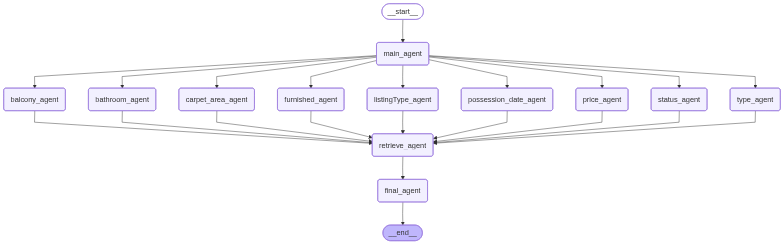

In [459]:
graph

In [495]:
inputs = {"user_query":"1 bhk unfurnished for buying in wakad, pune above 123 sqft upto price 1 crore should be ready before  dec 2025","df_dict":{}}

In [496]:
from pprint import pprint
for output in graph.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")
# Final generation
pprint(value["response"])

"Node 'main_agent':"
'\n---\n'
"Node 'balcony_agent':"
'\n---\n'
"Node 'bathroom_agent':"
'\n---\n'
"Node 'carpet_area_agent':"
'\n---\n'
"Node 'furnished_agent':"
'\n---\n'
"Node 'listingType_agent':"
'\n---\n'
"Node 'possession_date_agent':"
'\n---\n'
"Node 'price_agent':"
'\n---\n'
"Node 'status_agent':"
'\n---\n'
"Node 'type_agent':"
'\n---\n'
"Node 'retrieve_agent':"
'\n---\n'
"Node 'final_agent':"
'\n---\n'
AIMessage(content="Based on your query for **1 BHK, unfurnished apartments for buying in Wakad, Pune** with a **carpet area above 123 sq.ft.**, **price up to ₹1 crore**, and **ready for possession before December 2025**, here’s what I found from the provided data:\n\n---\n\n## **Summary of User Requirements:**\n- **Type:** 1BHK\n- **Furnished Type:** Unfurnished\n- **Listing Type:** Sell (Buy)\n- **Location:** Wakad, Pune\n- **Carpet Area:** Above 123 sq.ft.\n- **Budget:** Up to ₹1 crore (₹10,000,000)\n- **Possession Date:** Ready before or by December 2025\n\n---\n\n## **Data

In [494]:
inputs = {"user_query":"1 bhk unfurnished for buying in wakad, pune above 123 sqft upto price 1 crore should be ready before  dec 2025","df_dict":{}}

In [497]:
result = graph.invoke(inputs)

In [498]:
result

{'user_query': '1 bhk unfurnished for buying in wakad, pune above 123 sqft upto price 1 crore should be ready before  dec 2025',
 'output_dict': {'type': '1BHK',
  'furnishedType': 'UNFURNISHED',
  'listingType': 'Sell',
  'fullAddress': 'Wakad, Pune',
  'carpetArea': 123,
  'price': {'min': 0, 'max': 10000000},
  'possessionDate': '2025-12-01'},
 'df_dict': {'filtered_df_listing':       projectName              status       possessionDate  \
  0         Ashwini  UNDER_CONSTRUCTION  2025-09-28 00:00:00   
  1         Ashwini  UNDER_CONSTRUCTION  2025-09-28 00:00:00   
  2      Pristine02       READY_TO_MOVE                  NaN   
  3      Pristine02       READY_TO_MOVE                  NaN   
  4       Gurukripa  UNDER_CONSTRUCTION                  NaN   
  ..            ...                 ...                  ...   
  78    testring999  UNDER_CONSTRUCTION  2025-09-25 00:00:00   
  79   Queens Glory  UNDER_CONSTRUCTION  2027-12-31 00:00:00   
  80  Queens Avenue  UNDER_CONSTRUCTION  

In [499]:
result["response"].content

'Based on your query:\n\n**You asked for:**  \n* 1 BHK unfurnished flats for buying in Wakad, Pune  \n* Minimum carpet area: 123 sqft  \n* Price: Up to ₹1 crore  \n* Ready for possession before December 2025  \n\n**Here\'s what I found for you:**\n\n### Matching Property\n\n#### Project: **Ashwini**\n- **Location:** Mumbai Chembur  \n  (Please note: There are no listings specifying "Wakad, Pune" in the provided data. The closest matching property based on your requirements is this one, but it is located in Mumbai Chembur, not Pune.)\n\n#### **Details:**\n- **Type:** 1BHK\n- **Furnishing:** Unfurnished\n- **Carpet Area:** 123 sqft\n- **Price:** ₹1,11,11,111 (slightly above 1 crore)\n- **Bathrooms:** 1\n- **Balcony:** 1\n- **Listing Type:** Sell\n- **Status:** Under Construction\n- **Posession Date:** 28th September 2025\n- **Address:** Mumbai Chembur\n- **Landmark:** Babys School\n- **Images:** [Property](https://pub-d28896f69c604ec5aa743cb0397740d9.r2.dev/1756971672464-1e5179453b5df91d